In [1]:
import pandas as pd
import numpy as np
train_data = pd.read_csv('../data/full_size/atec_anti_fraud_train.csv',index_col = 0)
testb_data = pd.read_csv('../data/full_size/atec_anti_fraud_test_b.csv',index_col = 0)

In [ ]:
# find no missing value features
no_nan_features = []
i = 1
while i<len(testb_data.columns):
    name = testb_data.columns[i]
    if train_data[name].isnull().sum()==0:
        no_nan_features.append(name)
    i+=1

In [ ]:
small_missing_features=[]
i = 1
while i<len(testb_data.columns):
    name = testb_data.columns[i]
    train_missing_rate = train_data[name].isnull().sum()/train_data.shape[0]
    test_missing_rate = testb_data[name].isnull().sum()/testa_data.shape[0]
    if 0<train_missing_rate<0.3 and abs(test_missing_rate-train_missing_rate)<0.1:
        small_missing_features.append(name)
    i+=1

In [ ]:
len(small_missing_features+no_nan_features)

In [ ]:
# PCA
from sklearn.decomposition import TruncatedSVD
from sklearn.preprocessing import Imputer
svd = TruncatedSVD(n_components=100, n_iter=7, random_state=42)
svd.fit(impt.transform(train_data.loc[:,small_missing_features+no_nan_features]))
svd.transform(impt.transform(train_data.loc[:,small_missing_features+no_nan_features])).shape

In [ ]:
normal = train_data[train_data.label==0].loc[:,no_nan_features]
anormal = train_data[train_data.label==1].loc[:,no_nan_features]

In [ ]:
from matplotlib import style
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
%config InlineBackend.figure_format = 'svg'
for name in no_nan_features:
    ax = plt.subplot()
    sns.distplot(anormal[name],label='anormal',hist=False)
    sns.distplot(normal[name],label='normal',hist=False)
    plt.legend(loc='best')
    plt.show()

In [ ]:
from matplotlib import style
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
%config InlineBackend.figure_format = 'svg'
for name in no_nan_features:
    normal_ratio = normal[name].value_counts().sort_index()/normal[name].shape[0]
    anormal_ratio = anormal[name].value_counts().sort_index()/anormal[name].shape[0]
    plot_data = pd.DataFrame({'normal':normal_ratio,'anormal':anormal_ratio},index = normal_ratio.index)
    plot_data.plot(kind='bar',x=plot_data.index,y = ['normal','anormal'],grid=True,title=name)
    plt.show()
    

d:\python35\lib\site-packages\pandas\plotting\_core.py:1716: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  series.name = label


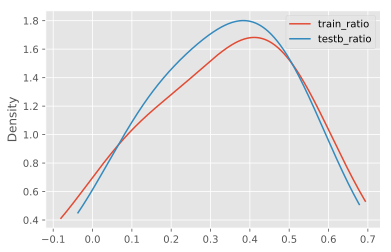

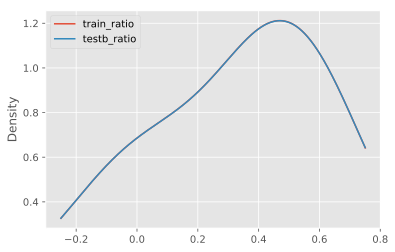

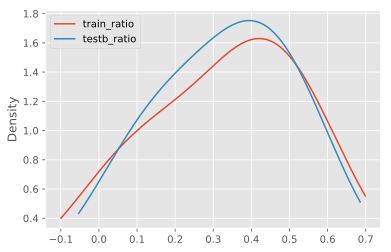

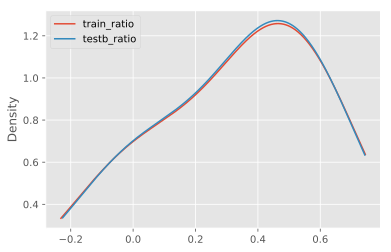

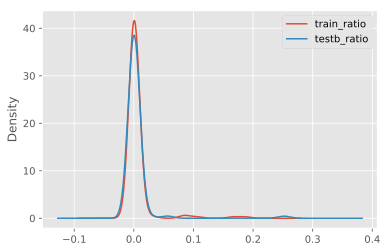

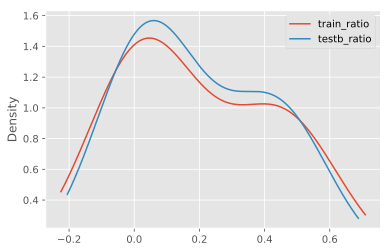

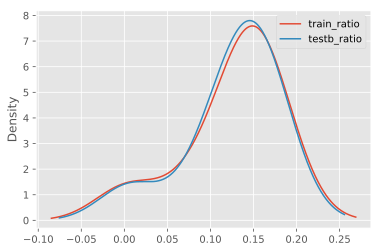

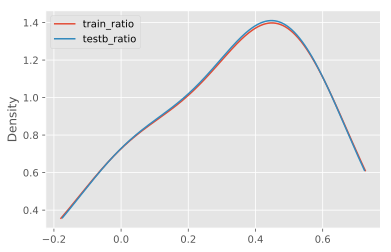

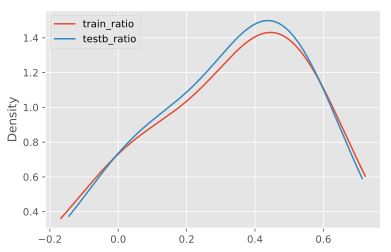

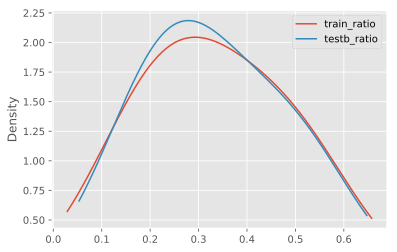

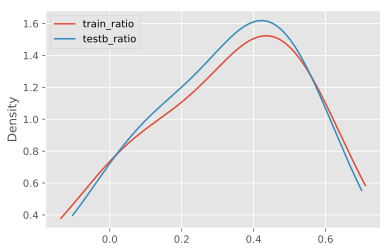

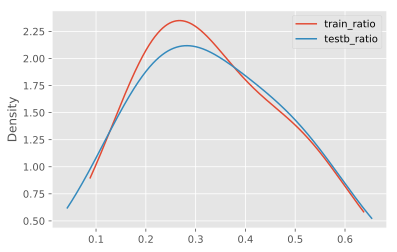

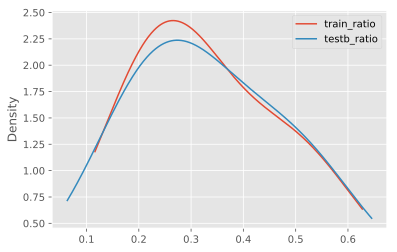

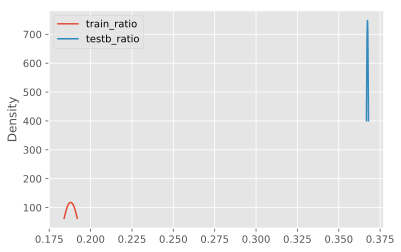

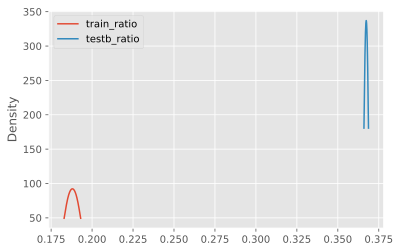

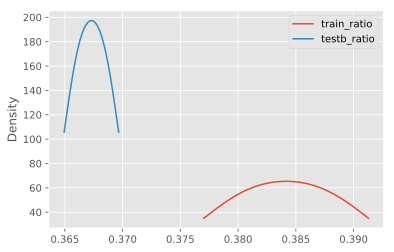

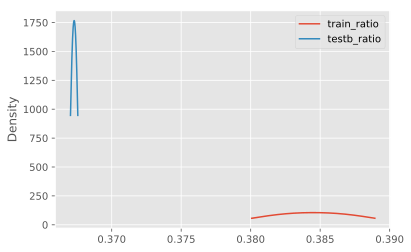

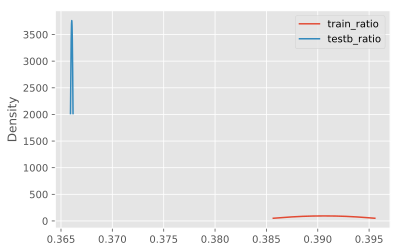

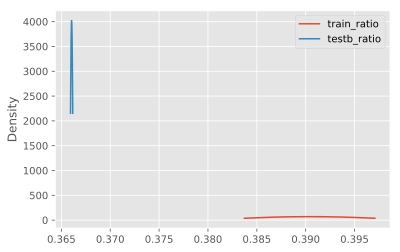

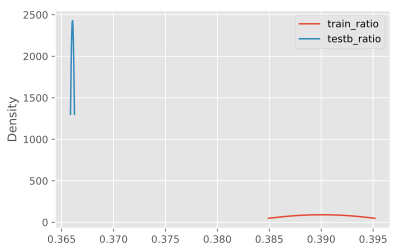

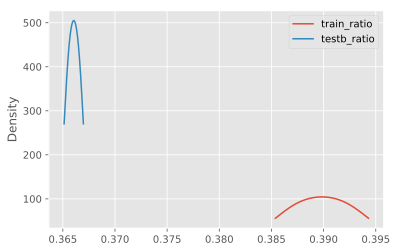

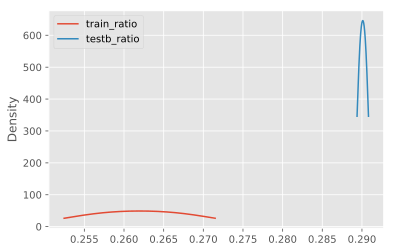

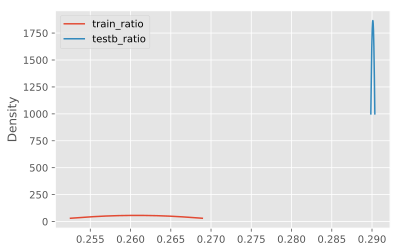

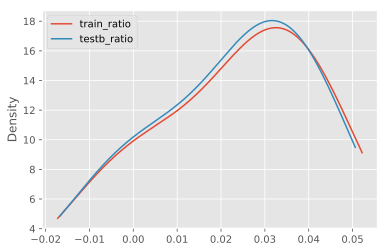

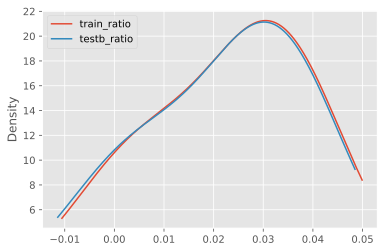

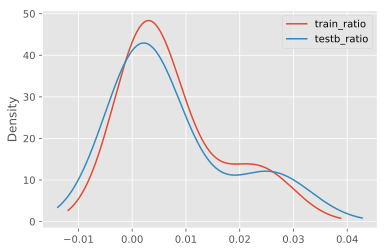

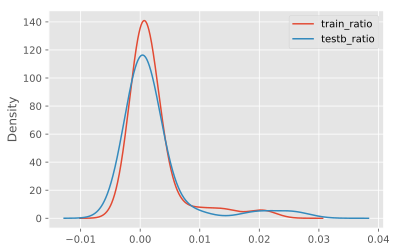

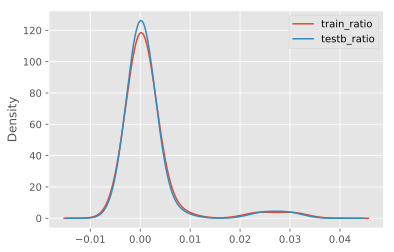

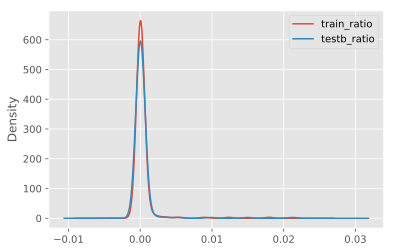

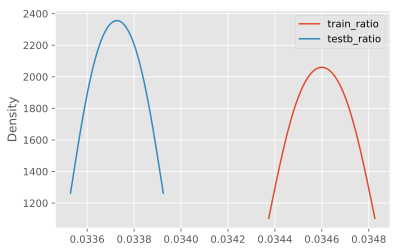

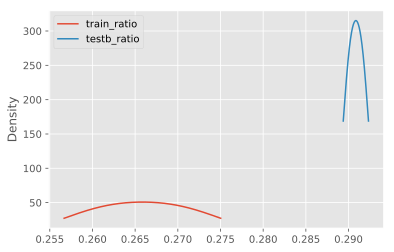

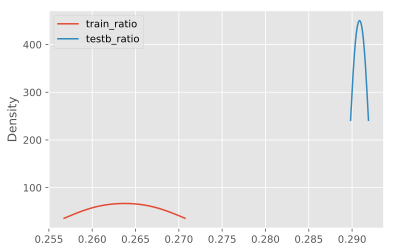

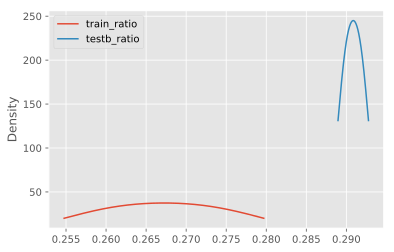

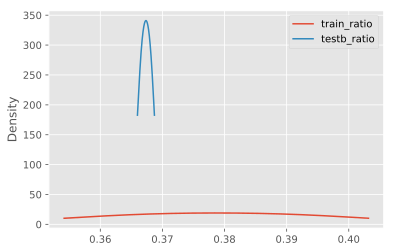

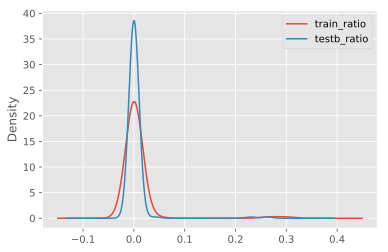

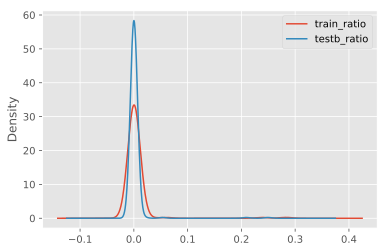

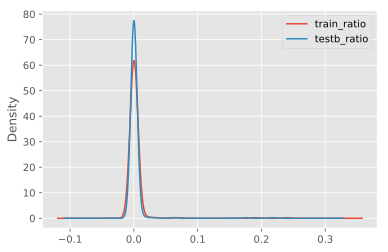

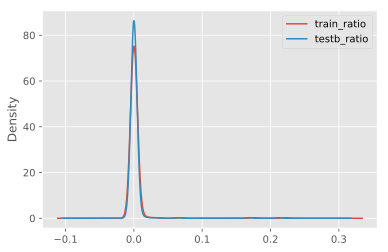

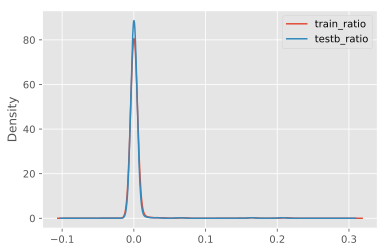

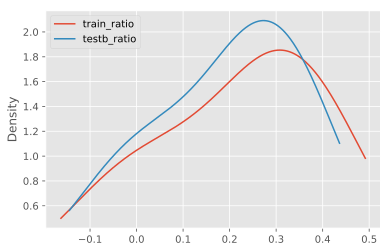

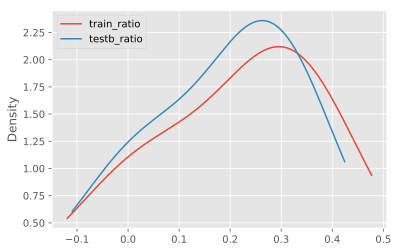

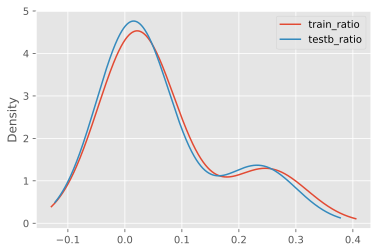

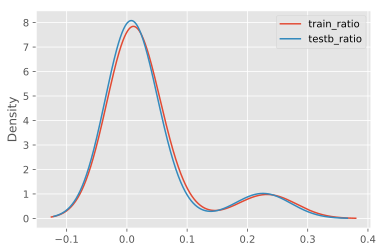

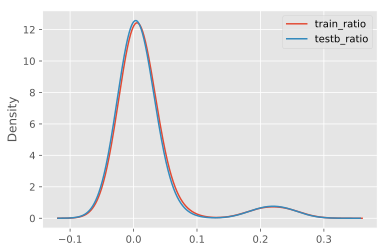

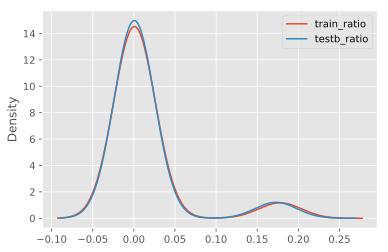

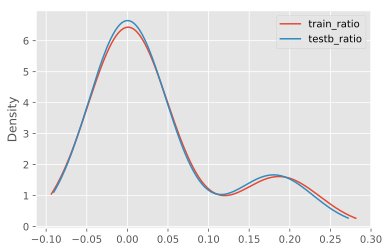

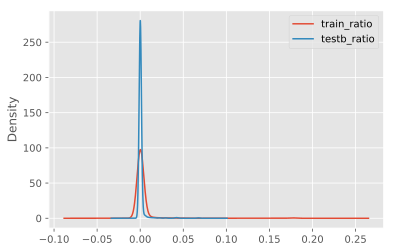

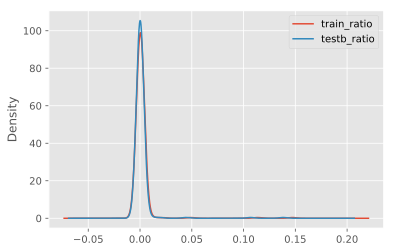

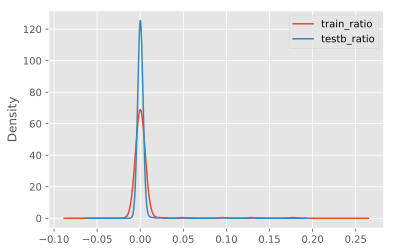

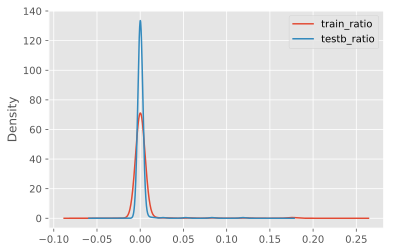

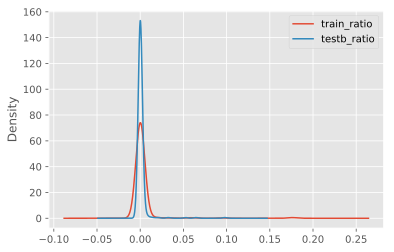

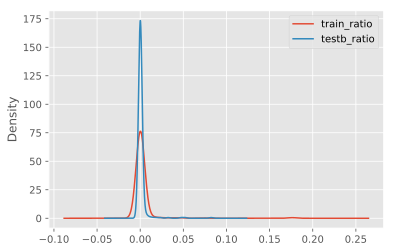

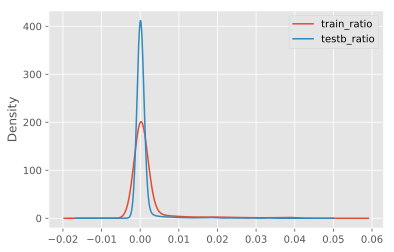

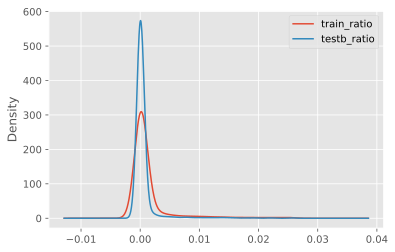

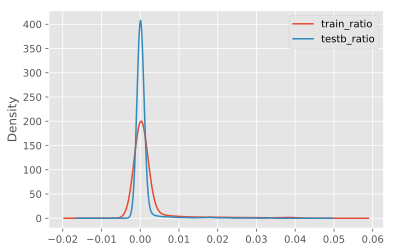

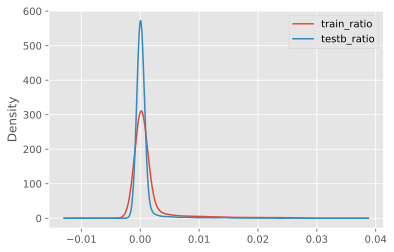

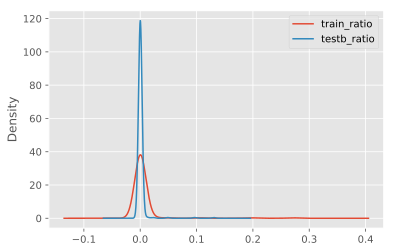

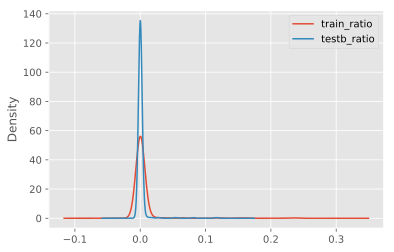

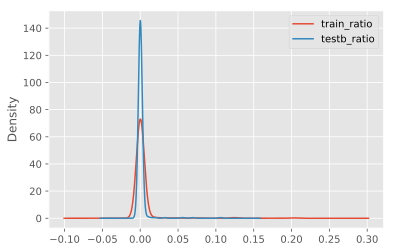

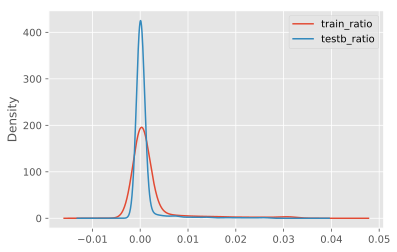

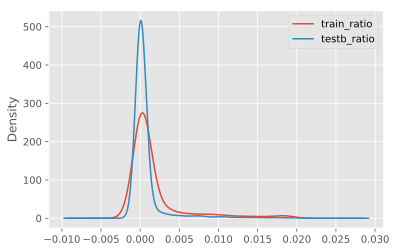

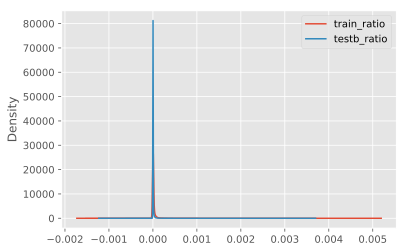

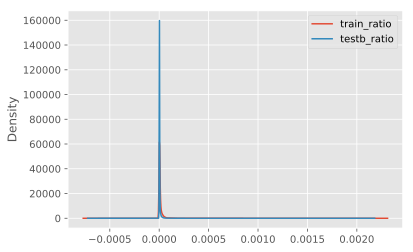

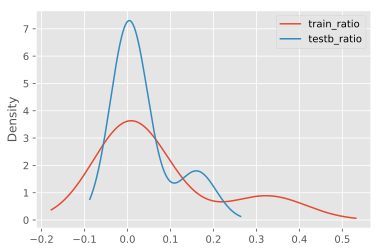

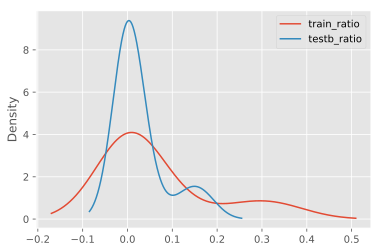

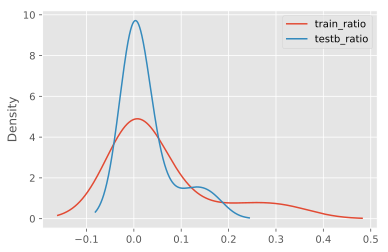

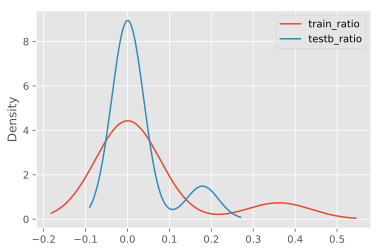

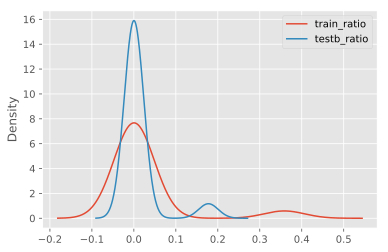

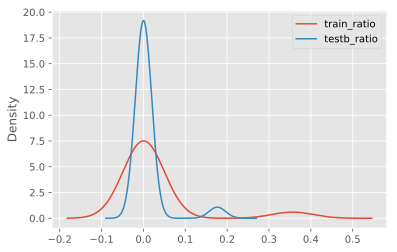

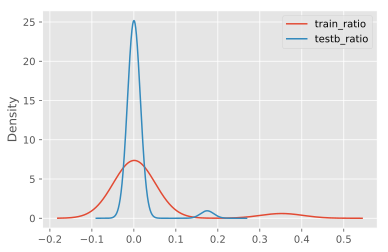

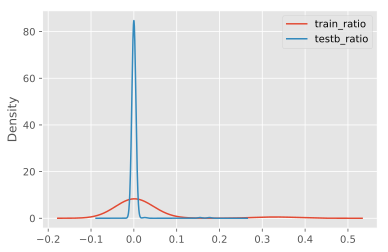

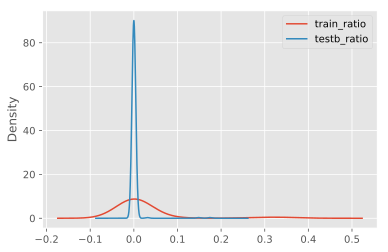

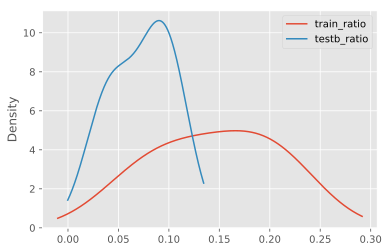

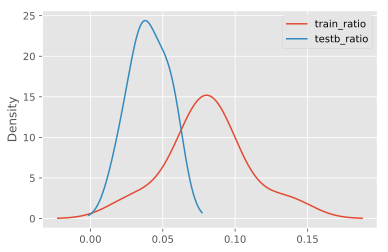

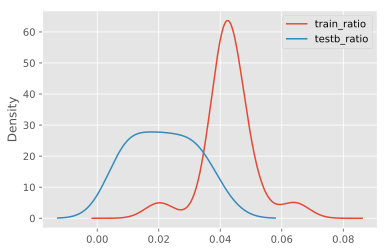

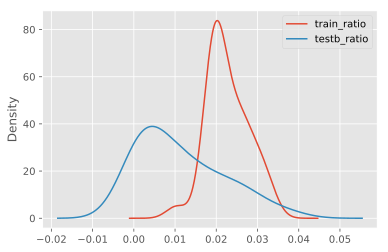

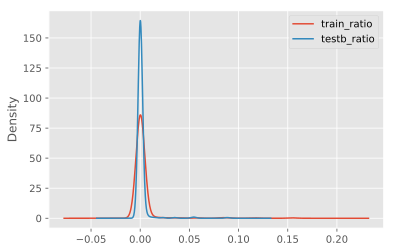

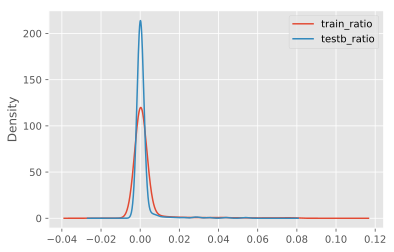

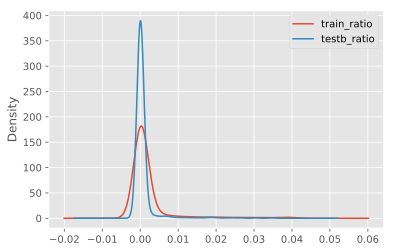

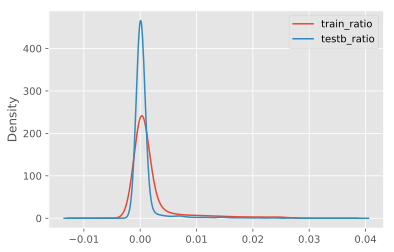

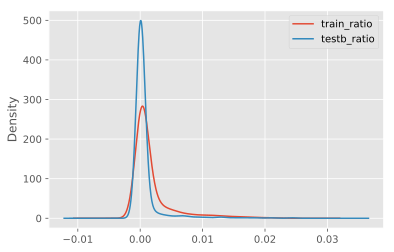

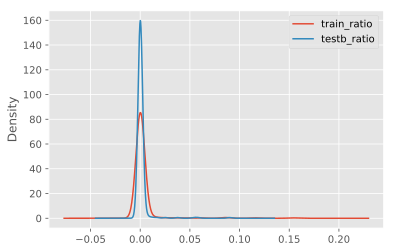

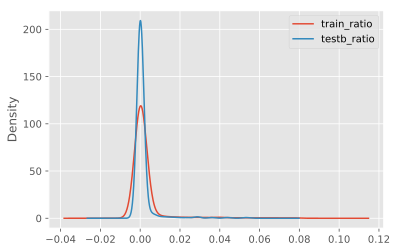

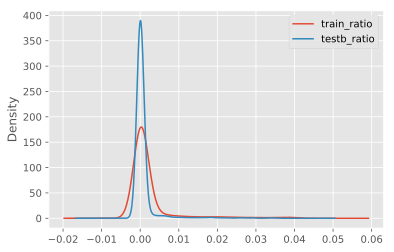

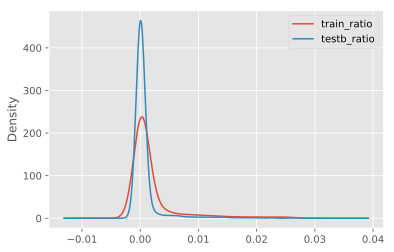

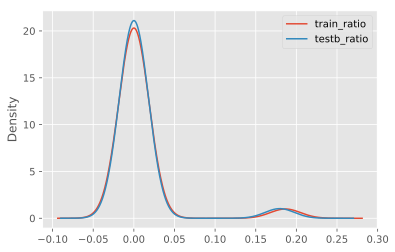

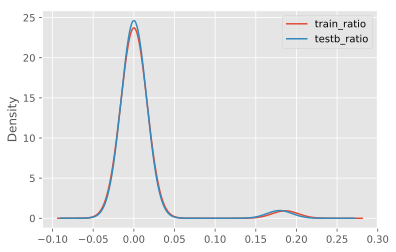

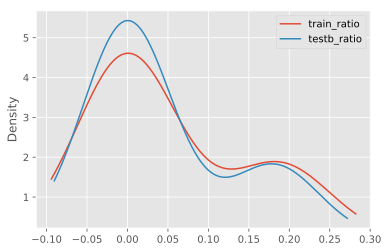

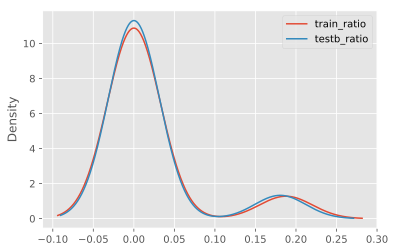

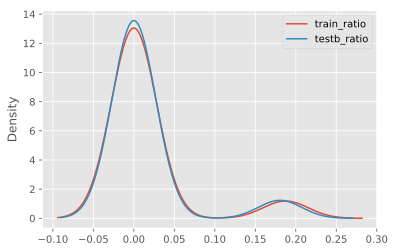

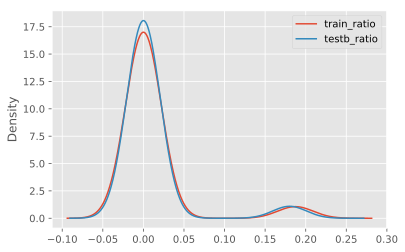

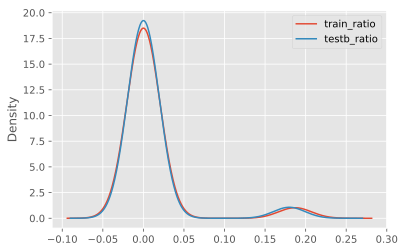

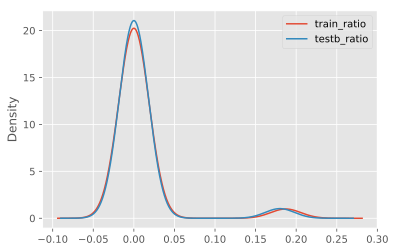

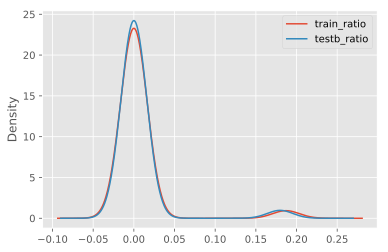

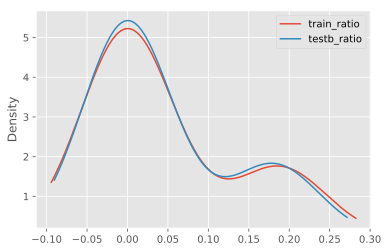

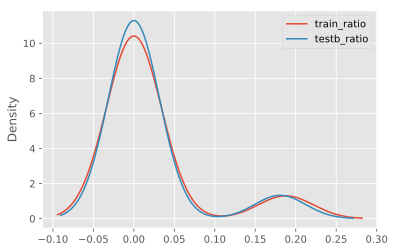

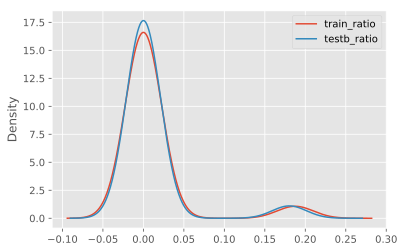

In [ ]:
    from matplotlib import style
    import matplotlib.pyplot as plt
    import seaborn as sns
    style.use('ggplot')
    %matplotlib inline
    %config InlineBackend.figure_format = 'svg'

    for name in testb_data.columns:
        if name!='date':
            testb_ratio = testb_data[name].value_counts().sort_index()/testb_data.shape[0]
            train_ratio = train_data[name].value_counts().sort_index()/train_data.shape[0]
            ratio = pd.DataFrame({'testb_ratio':testb_ratio,'train_ratio':train_ratio},index=testb_ratio.index)
            ratio.plot(kind='density',y=['train_ratio','testb_ratio'],title=name)
            plt.show()